# Proof of concept

Objective : Testing entire classification using a single image for a limited area and limited classifers on NDVI band.

### Implementation design
Idea is to implement the following
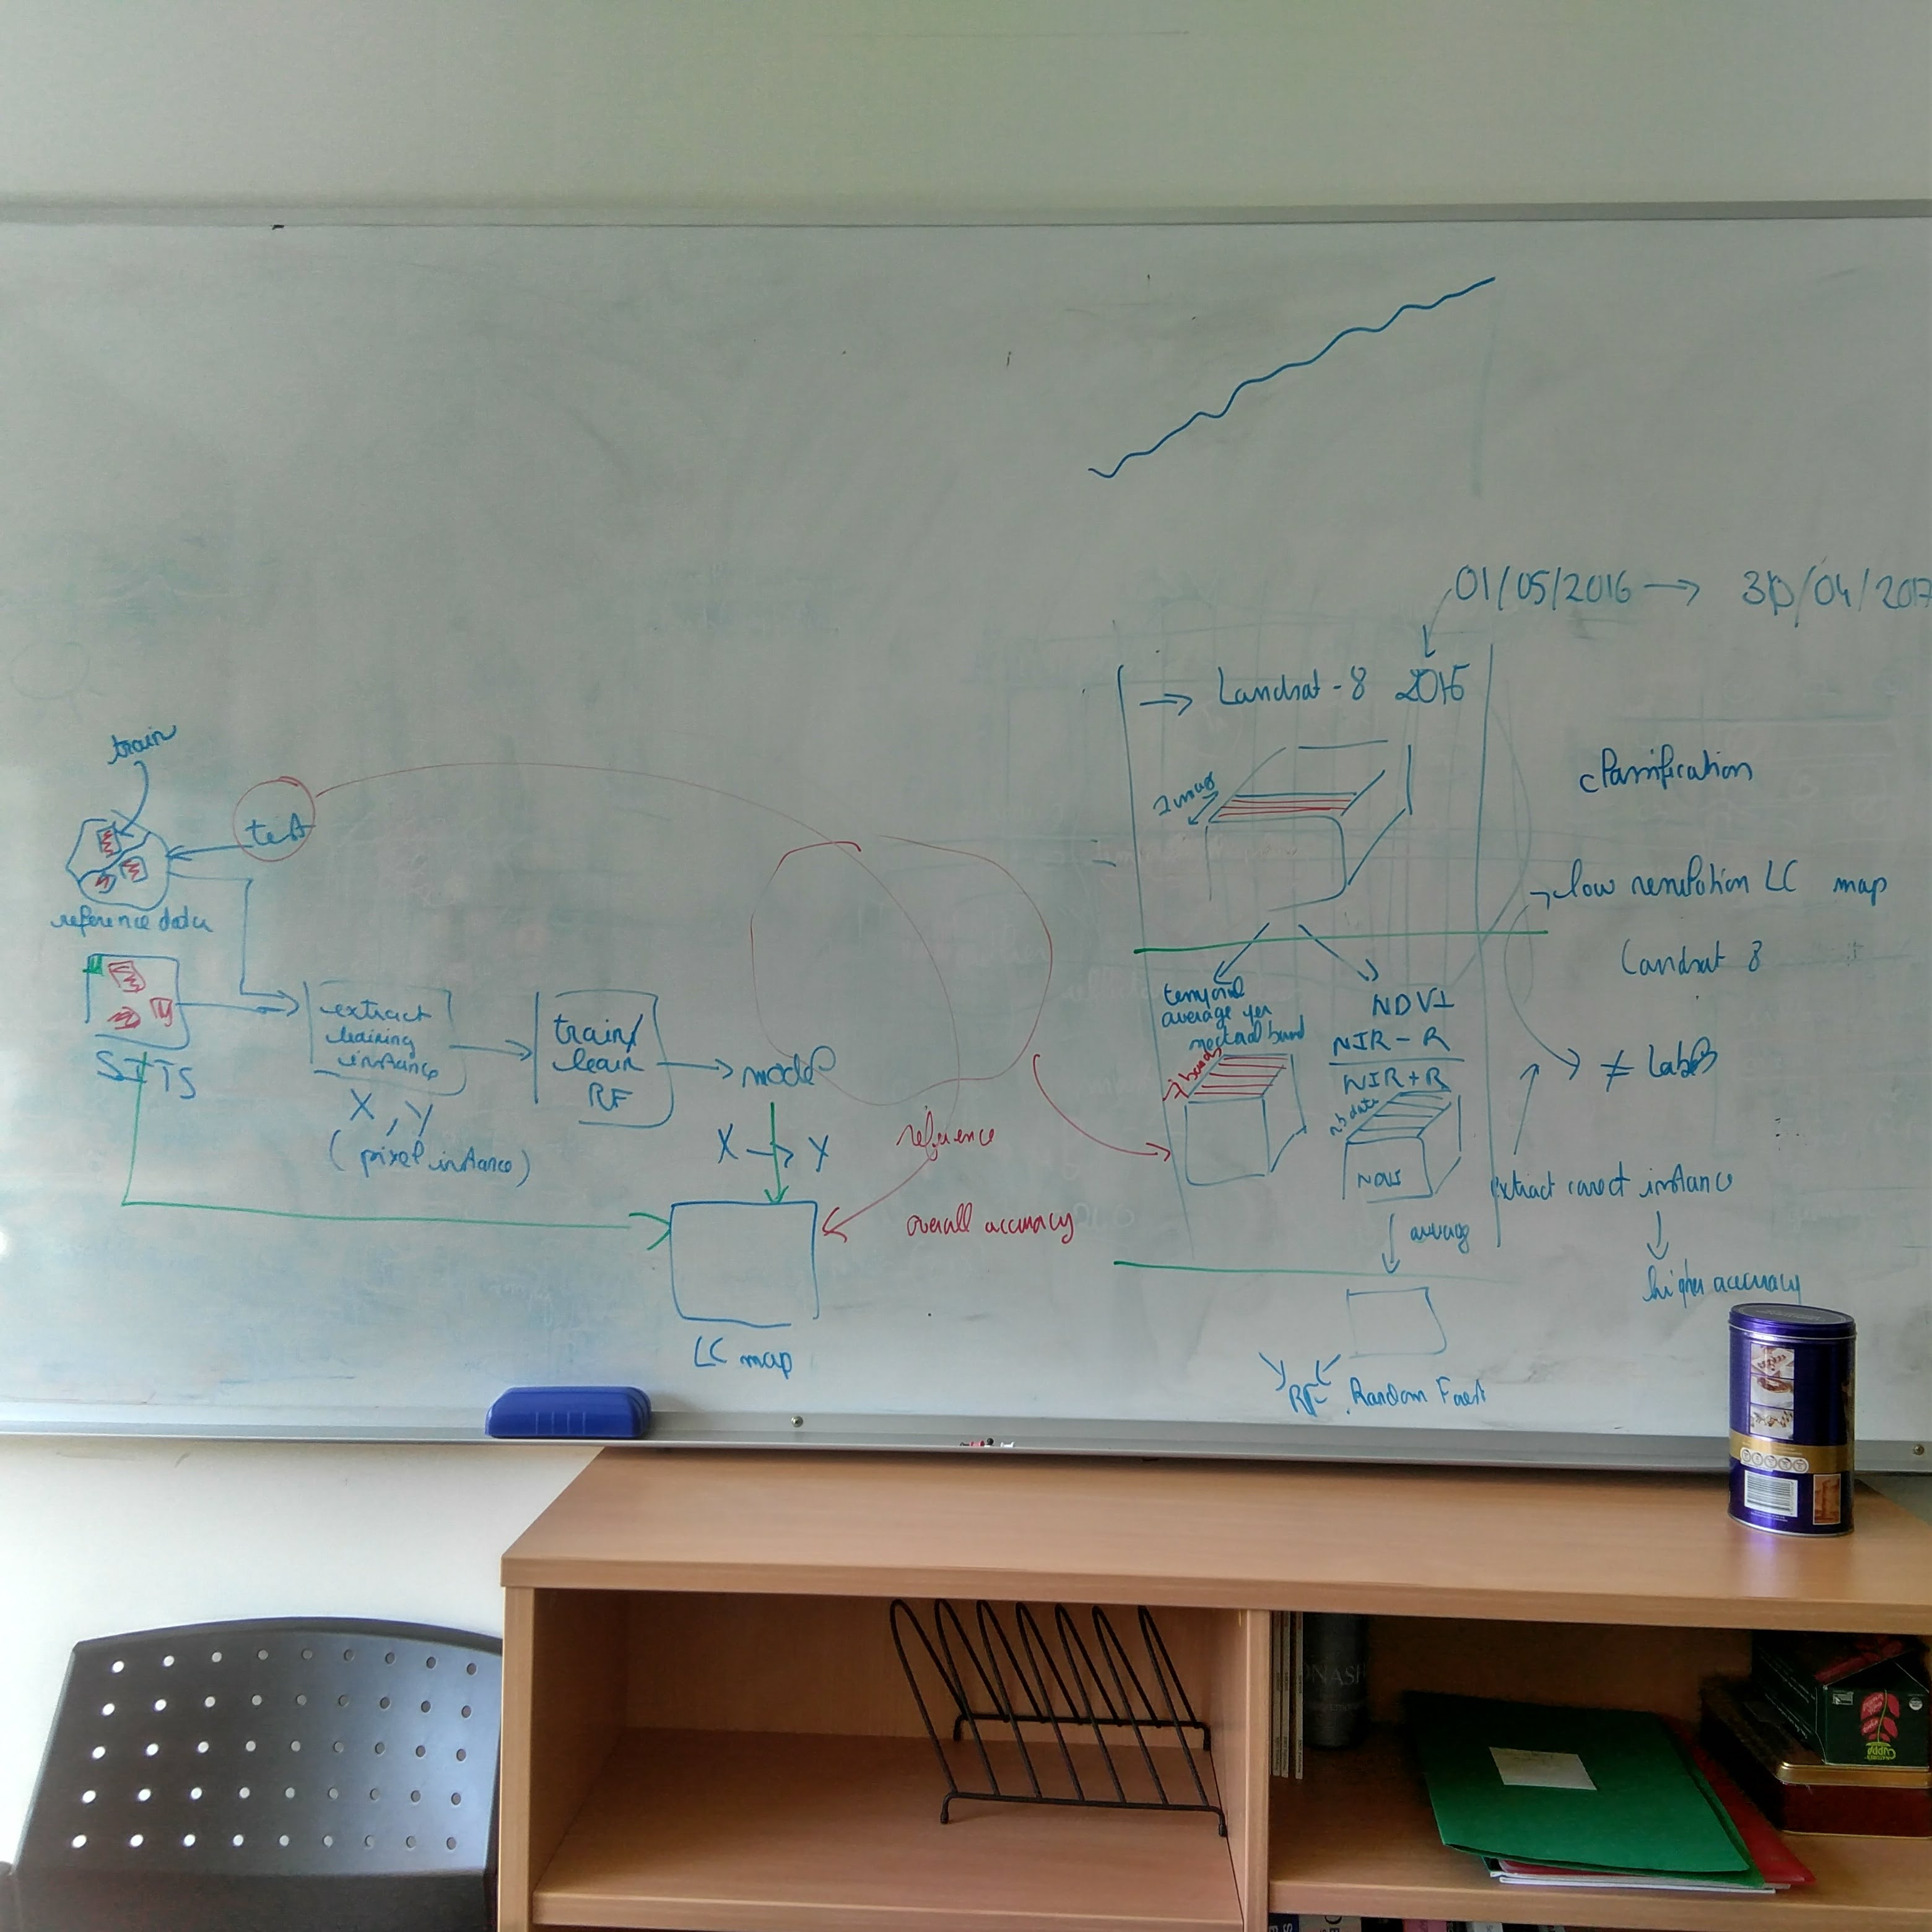

### Area selected
Area selected has coordinates
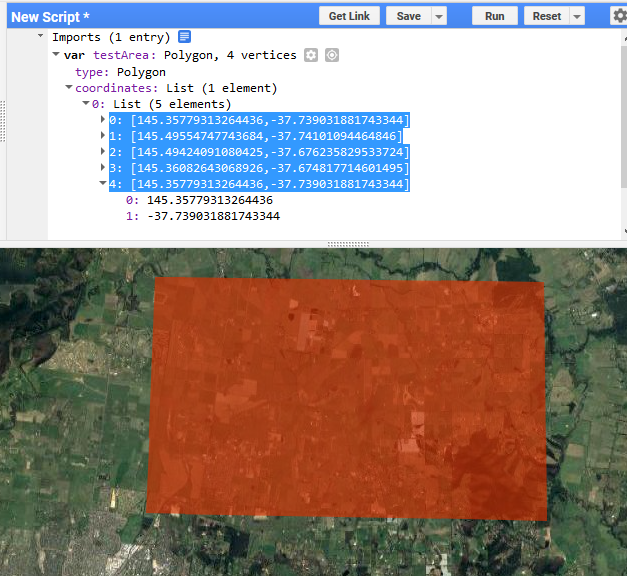
And 4 labels as

    Paster/ Grassland
    Non woody Horticulture
    Deciduous Woody Horticuture
    Native Woody Cover

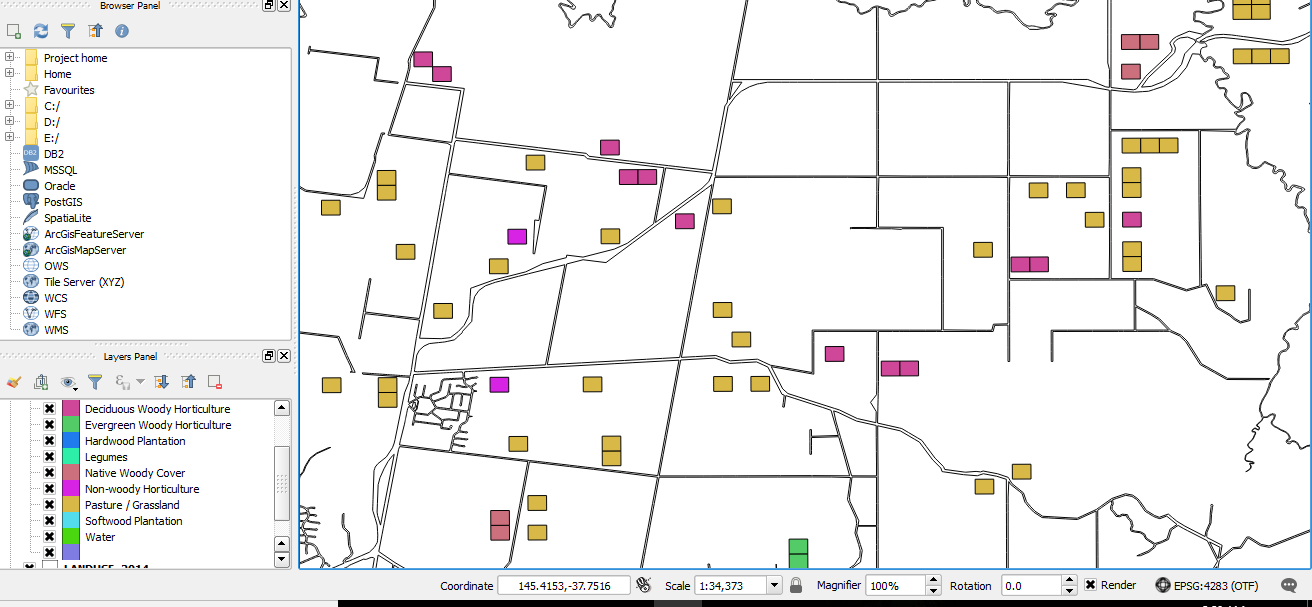

### Area cordinates 
0: [145.35779313264436,-37.739031881743344]
1: [145.49554747743684,-37.74101094464846]
2: [145.49424091080425,-37.676235829533724]
3: [145.36082643068926,-37.674817714601495]
4: [145.35779313264436,-37.739031881743344]

### Time period

The time period should correspond to the time period of the reference data which is from 2016-2017.

So we pull data from 1st May 2016 to 30th April 2017

**Data pulling Google earth engine JavaScript code.**

// Define and edit the geometry "testArea" in earth engine
var area = ee.FeatureCollection(testArea);  

// Making a collection of one year worth of Landsat-8 Surface Reflection Data, with area filter
var collection = ee.ImageCollection('LANDSAT/LC8_SR')
    .filterDate('2016-05-01', '2017-04-30')
    .filterBounds(area);

// This displays the metadata
print(collection);

// These are the default visiualization parameters
var vizParams = {
  min: 200,
  max: 2000,
  bands: ['B5', 'B4', 'B3']
};

// This function only shows the area which is selected
function cropCollection(collection) {
  return collection.clipToCollection(area);
}

// Using the median reducer here removes the clouds from the view
//Map.addLayer(collection.map(cropCollection).median(), vizParams);

// Taking only the image of Median NDVI of the selected area
var image = ee.Image(collection.map(cropCollection).median());
var ndvi = image.normalizedDifference(['B5', 'B4']);
Map.addLayer(ndvi, {min: 0, max: 1}, 'NDVI');

// Export the image, specifying scale and region.
Export.image.toDrive({
  image: ndvi,
  description: 'NDVI Image of the required area',
  scale: 30,
  region: area,
  crs: 'EPSG:3857'
});

After superpositioning the NDVI image with land reference data we observe that we have these number of following tags.

    34 - Paster/ Grassland
    2 - Non woody Horticulture
    12 - Deciduous Woody Horticuture
    3 - Native Woody Cover

Deciding the training and testing spit.

**NDVI**

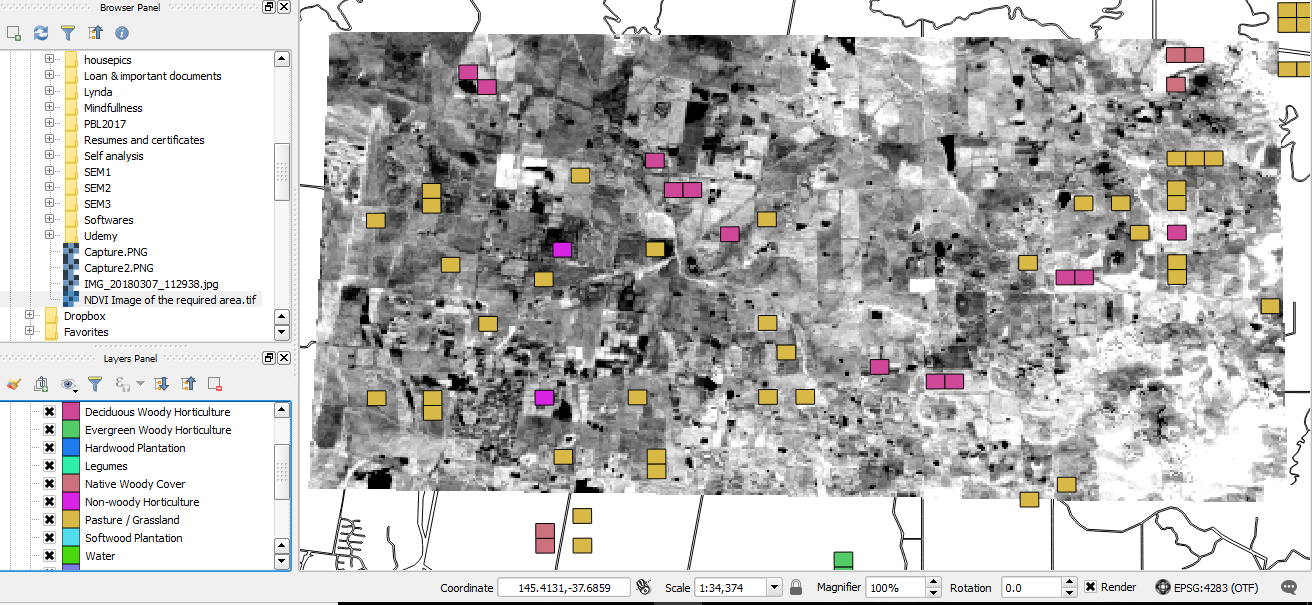

**RGB**

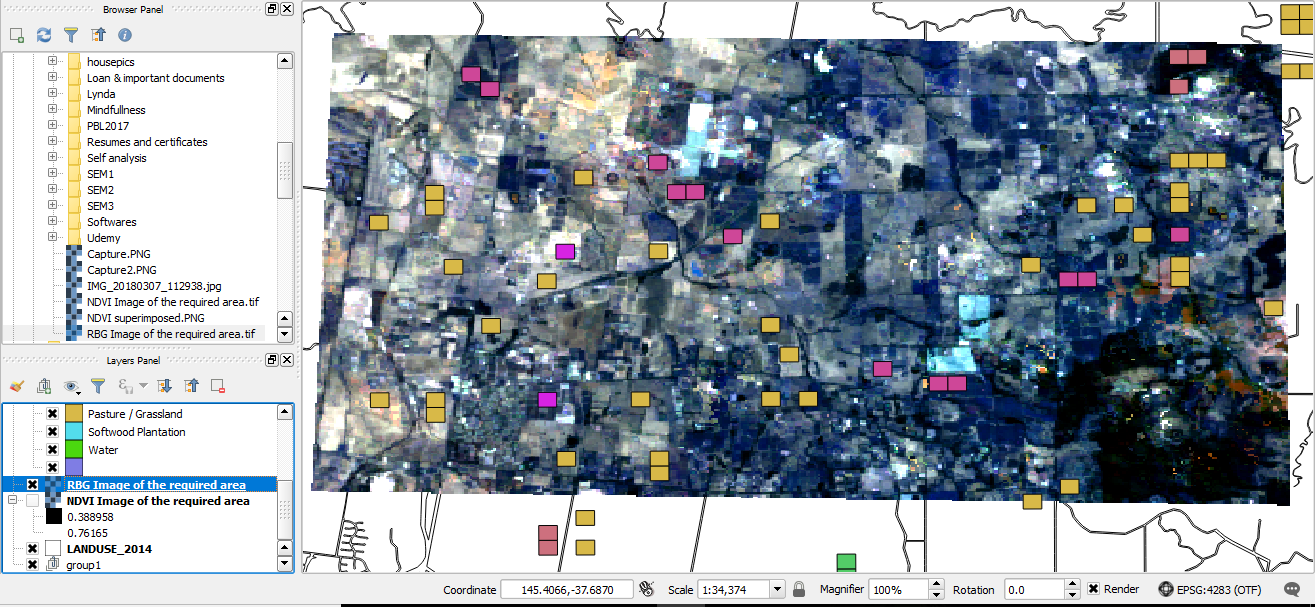

Now the part of Image processing using python begins,

        1. I need to do is create a training/testing spit for each labels. 
        2. Find the pixels which have clear labels
        3. Mediam values have been used for each pixel over one year to remove cloud cover (Might not be the best estimate as crops changes over season,yet I assume that one crop stays for the longest time)
        4. Try to build a basic image classifer on Kaggle
        5. Need only limited area from land reference data - how to filter?
        